## **Car Price Prediction - Linear Regression Modeling**

This is a notebook with the notes taken from the [Machine Learning Zoomcamp](https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp), based on the book **"Machine Learning Bookcamp"** written by Alexey Grigorev.

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Magic function to display matplotlib figures in a jupyter notebook
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")
len(df)

11914

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## **Data Pre-processing**

In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Standarizing column names and values

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [10]:
df.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


## **Initial Exploratory Data Analysis (EDA)**

In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Checking the distribution of the price

<AxesSubplot:xlabel='msrp', ylabel='Count'>

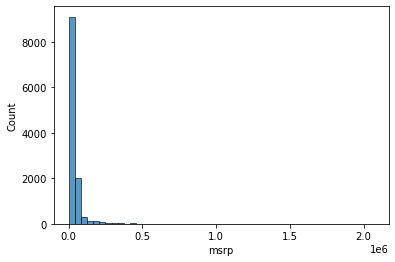

In [13]:
sns.histplot(df["msrp"], bins=50)

It can be observed that the distribution is a **long-tail distribution strongly right-skewed**. This means that most of the cars are cheap and only a few are very expensive.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

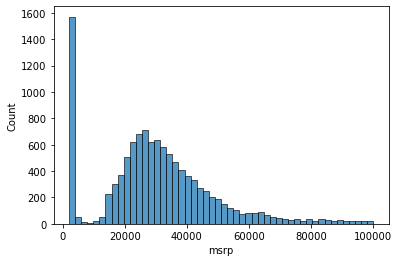

In [14]:
sns.histplot(df[df["msrp"] < 1e5]["msrp"], bins=50)

If we zoom in the graph to check the distribution of prices between 0 and 100k usd, it can be seen that the distribution is still right-skewed, with several values at about 1000 usd. This is probably because that's the minimum value the website allows people to sell their cars. Also, the majority of the cars at around 25k usd since the peak of the distribution is at that price. 

Therefore, this kind of distribution is not recommended for ML. ML models do not work very well when the data is not normally distributed, so the data needs to be transformed to be more normal.

There are several transformation methods, however, the most common one is to apply a logarithm to the data series:

In [15]:
np.log1p([0, 1, 10, 100, 1000, 10000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
        9.21044037, 11.51293546])

In [16]:
price_logs = np.log1p(df["msrp"])
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

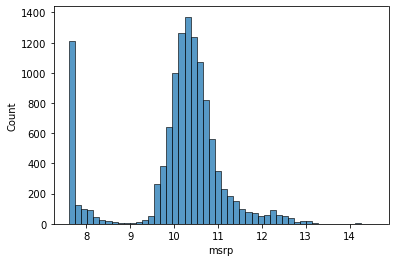

In [17]:
sns.histplot(price_logs, bins=50)

As observed, the tail is gone which provides a more normal distribution after applying the logarithm function.

### Checking missing values

In [18]:
df.isnull()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## **Validation framework**

In [20]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_train, n_val, n_test

(11914, 7150, 2382, 2382)

In [21]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]
len(df_test)

2382

However, theres a problem with this data splitting and that is because the data obeys a specific order. Hence, it is needed to re-accomodate rows randomly to split the data and grab random registries for each training, validation and testing subset.

In [22]:
# Seed for reproducibility
np.random.seed(2)

# Defining lengths of subsets
n = len(df)                      # Total length

n_val = int(0.2 * n)             # Validation subset length
n_test = int(0.2 * n)            # Test subset length
n_train = n - (n_val + n_test)   # Training subset length

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]       # Shuffled dataframe

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [23]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [24]:
y_train_orig = df_train["msrp"].values
y_val_orig = df_val["msrp"].values
y_test_orig = df_test["msrp"].values

# Log-scale of original target variable values
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

# Deleting original target values to avoid perfect fitting of the model for inputting original values.
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

## **Linear regression**

### Defining the model for training

In [25]:
def train_linear_regression(X, y):
    ones = np.ones(shape=X.shape[0])    # Dummy values for x vectors
    X = np.column_stack([ones, X])      # Stack dummy values x[0] = 1

    XTX = X.T.dot(X)                    # Dot product of the transpose of the matrix X and the matrix X to get a squared shape matrix
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)         # Normal equation: w = [(X^T).X]^(-1).(X^T).y

    return w[0], w[1:]

### Baseline solution

In [26]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
df_num = df_train[base]
df_num.head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2735,148.0,4.0,33,24,1385
6720,132.0,4.0,32,25,2031
5878,148.0,4.0,37,28,640
11190,90.0,4.0,18,16,873
4554,385.0,8.0,21,15,5657


In [27]:
df_num.isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [28]:
df_num = df_num.fillna(0)
df_num.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [29]:
X_train = df_num.values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [30]:
# Training the linear regression model
w_0, w = train_linear_regression(X_train, y_train)

In [31]:
y_pred = w_0 + X_train.dot(w)

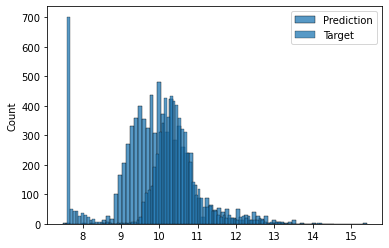

In [32]:
sns.histplot(y_pred, label="Prediction")
sns.histplot(y_train, label="Target")
plt.legend()

### Evaluating the quality of the model

In [33]:
def rmse(y, y_pred):
    err = y_pred - y
    mse = (err ** 2).mean()
    return np.sqrt(mse)

In [34]:
rmse(y_train, y_pred)

0.7554192603920132

This number tells us that on average, the model's predictions are off by 75.54%. This result alone may not be very useful, but we can use it to compare this model with other models. If one model has a lower RMSE than the other, it indicates that the model is better.

### Validating the model

In [35]:
# Using the validation subset
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [36]:
y_pred = w_0 + X_val.dot(w)

In [37]:
rmse(y_val, y_pred)

0.7616530991301601

In [38]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [39]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

Validation: 0.7616530991301601


### Simple feature engineering

In [40]:
def prepare_X(df):
    df = df.copy()                  # Creates a copy of the input parameters to prevent side effects
    features = base.copy()          # Creates a copy of the base list with the basic features

    df["age"] = 2017 - df["year"]   # Calculates the age of the car
    features.append("age")

    df_num = df[features]
    df_num = df_num.fillna(0)       # Changes NaN values for 0
    X = df_num.values               # Creates X matrix
    return X

In [41]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

Validation: 0.5172055461058335


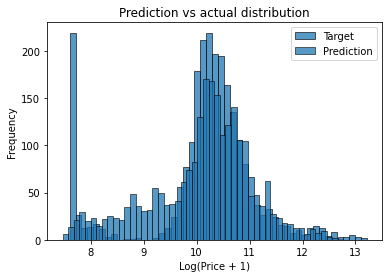

In [42]:
sns.histplot(y_val, label='Target', bins=50)
sns.histplot(y_pred, label='Prediction', bins=50)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Prediction vs actual distribution')

plt.show()

### Handling categorical values

In [43]:
df["make"].value_counts().head()

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [44]:
def prepare_X(df):
    df = df.copy()                  # Creates a copy of the input parameters to prevent side effects
    features = base.copy()          # Creates a copy of the base list with the basic features

    df["age"] = 2017 - df["year"]   # Calculates the age of the car
    features.append("age")

    for v in [2, 3, 4]:             # Encodes the number_of_doors variable
        feature = "num_doors_%s" % v
        df[feature] = (df["number_of_doors"] == v).astype(int)
        features.append(feature)
    
    for v in ["chevrolet", "ford", "volkswagen", "toyota", "dodge"]:  # Encodes the make variable
        feature = "is_make_%s" % v
        df[feature] = (df["make"] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)       # Changes NaN values for 0
    X = df_num.values               # Creates X matrix
    return X

In [45]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

Validation: 0.5076038849557035


Compared to the previous RMSE, the new one is better since 50.76% < 51.71%.

In [46]:
for col in df_train.columns:
    print(f"{col} =", len(df_train[col].unique()))

make = 48
model = 881
year = 28
engine_fuel_type = 10
engine_hp = 345
engine_cylinders = 10
transmission_type = 5
driven_wheels = 4
number_of_doors = 4
market_category = 70
vehicle_size = 3
vehicle_style = 16
highway_mpg = 56
city_mpg = 66
popularity = 48


In [47]:
def prepare_X(df):
    df = df.copy()                  # Creates a copy of the input parameters to prevent side effects
    features = base.copy()          # Creates a copy of the base list with the basic features

    df["age"] = 2017 - df["year"]   # Calculates the age of the car
    features.append("age")

    for v in [2, 3, 4]:             # Encodes the number_of_doors variable
        feature = "num_doors_%s" % v
        df[feature] = (df["number_of_doors"] == v).astype(int)
        features.append(feature)
    
    for v in ["chevrolet", "ford", "volkswagen", "toyota", "dodge"]:  # Encodes the make variable
        feature = "is_make_%s" % v
        df[feature] = (df["make"] == v).astype(int)
        features.append(feature)
    
    for v in ["regular_unleaded", "premium_unleaded_(required)", "premium_unleaded_(recommended)", "flex-fuel_(unleaded/e85)"]:
        # Encodes the engine_fuel_type variable
        feature = "is_type_%s" % v
        df[feature] = (df["engine_fuel_type"] == v).astype(int)
        features.append(feature)
    
    for v in ["automatic", "manual", "automated_manual"]:  # Encodes the transmission variable
        feature = "is_transmission_%s" % v
        df[feature] = (df["transmission_type"] == v).astype(int)
        features.append(feature)

    for v in ["front_wheel_drive", "rear_wheel_drive", "all_wheel_drive", "four_wheel_drive"]:
        # Encodes the driven_wheels variable
        feature = "is_driven_wheels_%s" % v
        df[feature] = (df["driven_wheels"] == v).astype(int)
        features.append(feature)
    
    for v in ["crossover", "flex_fuel", "luxury", "luxury,performance", "hatchback"]:
        # Encodes the market_category variable
        feature = "is_mc_%s" % v
        df[feature] = (df["market_category"] == v).astype(int)
        features.append(feature)
    
    for v in ["compact", "midsize", "large"]:
        # Encodes the vehicle_size variable
        feature = "is_size_%s" % v
        df[feature] = (df["vehicle_size"] == v).astype(int)
        features.append(feature)
    
    for v in ["sedan", "4dr_suv", "coupe", "convertible", "4dr_hatchback"]:
        # Encodes the vehicle_style variable
        feature = "is_style_%s" % v
        df[feature] = (df["vehicle_size"] == v).astype(int)
        features.append(feature)
    
    df_num = df[features]
    df_num = df_num.fillna(0)       # Changes NaN values for 0
    X = df_num.values               # Creates X matrix
    return X

In [48]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

LinAlgError: Singular matrix

The previous code runs an error called ***Singular matrix*** and it basically means that a matrix cannot be inverted. In this case, the matrix XTX (which is the dot product between the transpose of X and the matrix X) is not possible to be inverted. This is because of the noise that is present in the values of the dataframe. Values recorded such as 1.3 instead of 13, or 0.09999999 instead of 0.1, makes it very difficult for NumPy to deal with. For this reason, however, some of the weights (wi) become extremely large (these wi values depend on the OS and the NumPy version installed).

In numerical linear algegra such issues are called ***numerical instability issues*** and they are tipically resolved with **regularization**.

### Regularization

Regularization basically means *controlling*, and in this case what needs to be controlled are the values of the weights (wi).

In [49]:
def train_linear_regression(X, y, r=0.0):   # controls the amount of regularization by using the parameter r
    ones = np.ones(shape=X.shape[0])        # Dummy values for x vectors
    X = np.column_stack([ones, X])          # Stack dummy values x[0] = 1

    XTX = X.T.dot(X)                        # Dot product of the transpose of the matrix X and the matrix X to get a squared shape matrix C
    reg = r * np.eye(XTX.shape[0])          # Multiplying an r factor to the identity matrix
    XTX = XTX + reg                         # Regularizing = adding the r factor
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)             # Normal equation: w = [(X^T).X]^(-1).(X^T).y

    return w[0], w[1:]

In [50]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

Validation: 0.4648238682032247


As observed, the result is an improvement from 50.76% to 46.48%

In [51]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0]:
    w_0, w = train_linear_regression(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print("%6s" %r, rmse(y_val, y_pred))

 1e-06 0.46482313191815516
0.0001 0.46482239266220077
 0.001 0.4648238682032247
  0.01 0.46483859724034493
   0.1 0.4649888853681952
   1.0 0.46662848880591756
   5.0 0.4738308304748765
  10.0 0.4817022849206446


We can see that the best performance is achieved with a smalled r. However, it can also be noticed that the performance for values below 0.1 don't change much except in the sixth digit, which shouldn't be considered as significant. Let's take the model with r=0.01 as the final model and test it against the test subset.

### Testing the model

In [52]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print("Test:", rmse(y_test, y_pred))

Validation: 0.46483859724034493
Test: 0.45923577813688377


In [53]:
ad = {
    "city_mpg": 18,
    "driven_wheels":"all_wheel_drive",
    "engine_cylinders": 6.0,
    "engine_fuel_type": "regular_unleaded",
    "engine_hp": 268.0,
    "highway_mpg": 25,
    "make": "toyota",
    "market_category": "crossover,performance",
    "model": "venza",
    "number_of_doors": 4.0,
    "popularity": 2031,
    "transmission_type": "automatic",
    "vehicle_size": "midsize",
    "vehicle_style": "wagon",
    "year": 2013
}

In [54]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
print("The suggested price is: ${:.2f} USD".format(suggestion[0]))
print("The real price is: $31120.00 USD")

The suggested price is: $27365.68 USD
The real price is: $31120.00 USD
